# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading Dataset

In [2]:
# Read the dataset
df = pd.read_csv('conversion_data.csv')
print(df.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


In [3]:
# Check data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB
None


In [4]:
# Data summary
print(df.describe())
print('---------------------------------------------------------------------')

print(df.describe(include=[np.object]))
# See object data
print('---------------------------------------------------------------------')

# Count country
print(df.groupby('country').count())
# Count source
print('---------------------------------------------------------------------')

print(df.groupby('source').count())

                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000
---------------------------------------------------------------------
       country  source
count   316200  316200
unique       4       3
top         US     Seo
freq    178092  155040
---------------------------------------------------------------------
            age  new_user  source  total_pages_visited  converted
country                        

# Removing Outliers for Age

In [5]:
# Get unique value for age and sorted
age_Unique = df.age.unique()
print(sorted(age_Unique))
print('---------------------------------------------------------------------')

# Check row that age above 100
print(df[df.age > 79])
print('---------------------------------------------------------------------')

# Remove outliers
df = df[df.age < 80]
print(df.describe())

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123]
---------------------------------------------------------------------
        country  age  new_user source  total_pages_visited  converted
90928   Germany  123         0    Seo                   15          1
295581       UK  111         0    Ads                   10          1
---------------------------------------------------------------------
                 age       new_user  total_pages_visited      converted
count  316198.000000  316198.000000        316198.000000  316198.000000
mean       30.569311       0.685469             4.872918       0.032252
std         8.268958       0.464329             3.341053       0.176669
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000            

# Data Visluzation

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64


Text(0.5, 1.0, 'Conversion Per Country')

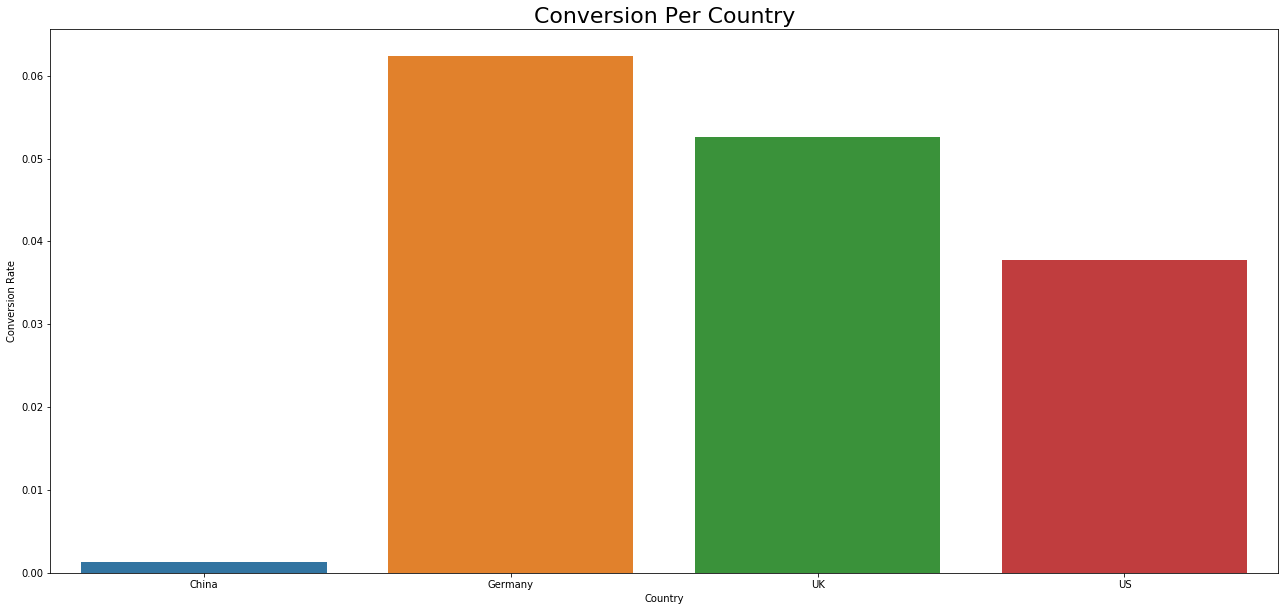

In [6]:
# Conversion Rate Per Country
convert_by_country = df.groupby(["country"]).mean()['converted']
print(convert_by_country)

fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.barplot(x='country', y='converted', ci=0, order=['China', 'Germany', 'UK', 'US'], data=df, ax=ax)
ax.set(xlabel='Country', ylabel='Conversion Rate')
ax.set_title('Conversion Per Country', fontsize=22)

total_pages_visited
1     0.000000
2     0.000228
3     0.000251
4     0.000780
5     0.001570
6     0.003437
7     0.006769
8     0.015238
9     0.033067
10    0.061068
11    0.123471
12    0.244537
13    0.400825
14    0.587521
15    0.740181
16    0.871818
17    0.923077
18    0.961219
19    0.989381
20    0.997531
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    1.000000
28    1.000000
29    1.000000
Name: converted, dtype: float64


Text(0.5, 1.0, 'Conversion Per Page Visited')

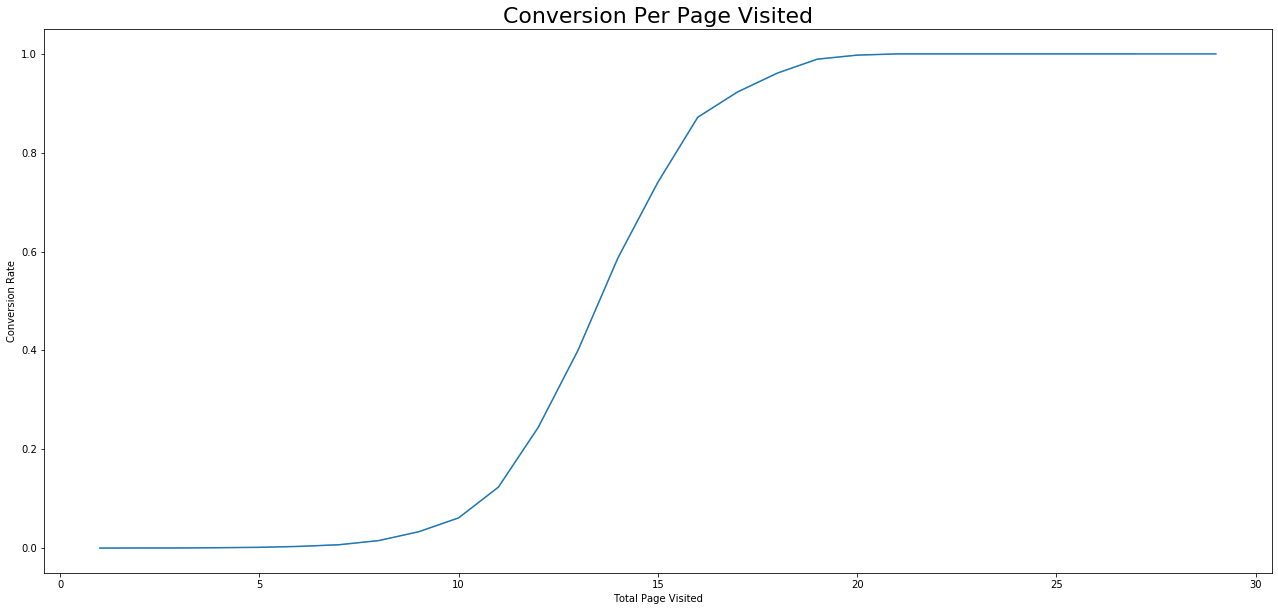

In [7]:
# Conversion Rate Per ATotal Page Visited
convert_by_pageVisit = df.groupby(["total_pages_visited"]).mean()['converted']
print(convert_by_pageVisit)

fig, ax2 = plt.subplots(figsize=(22, 10))
ax2 = sns.lineplot(x="total_pages_visited", y="converted", data=df, ci=0, ax=ax2)
ax2.set(xlabel='Total Page Visited', ylabel='Conversion Rate')
ax2.set_title('Conversion Per Page Visited', fontsize=22)

# Machine Learning Using H2O.AI

In [8]:
# Imporat H2O Machine Learning
import h2o
from h2o.frame import H2OFrame
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from F:\Anaconda\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HaiLin\AppData\Local\Temp\tmp3imkgmhp
  JVM stdout: C:\Users\HaiLin\AppData\Local\Temp\tmp3imkgmhp\h2o_HaiLin_started_from_python.out
  JVM stderr: C:\Users\HaiLin\AppData\Local\Temp\tmp3imkgmhp\h2o_HaiLin_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_HaiLin_5hd42w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.761 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [9]:
# Ccnvert Germany to shorter name
df["country"].replace({"Germany": "DE"}, inplace=True)

# Change to H2O data frame
h2o_df = H2OFrame(df)

# Convert data types as factor
h2o_df['new_user'] = h2o_df['new_user'].asfactor()
h2o_df['converted'] = h2o_df['converted'].asfactor()

h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,country,age,new_user,source,total_pages_visited,converted
type,enum,int,enum,enum,int,enum
mins,,17.0,,,1.0,
mean,,30.569311001334512,,,4.872918234777012,
maxs,,79.0,,,29.0,
sigma,,8.26895759642145,,,3.3410533442156147,
zeros,,0,,,0,
missing,0,0,0,0,0,0
0,UK,25.0,1,Ads,1.0,0
1,US,23.0,1,Seo,5.0,0
2,US,28.0,1,Seo,4.0,0


In [10]:
# Select controlled variables
features = list(h2o_df.columns)

# Remove dependent variable
features.remove('converted') 

# Selected list of controlled variables
features

['country', 'age', 'new_user', 'source', 'total_pages_visited']

In [12]:
# Split data into 80% as training dataset and 20% as test dataset
data_split = h2o_df.split_frame(ratios = [0.8], seed=123)
data_train = data_split[0]
data_test = data_split[1]

# Training dataset
print('Training Dataset:', data_train.shape)

# Test dataset
print('Test Dataset:', data_test.shape)

Training Dataset: (253134, 6)
Test Dataset: (63064, 6)


# Building Logistic Regression

In [13]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family = 'binomial', model_id = 'glm_default')
glm_model.train(x = features, y = 'converted', training_frame = data_train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
# Logistic Regression Model Summary
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 1.861E-4 )",11,9,7,py_7_sid_b8d3




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.010791634628724183
RMSE: 0.10388279274607601
LogLoss: 0.04049669936235408
Null degrees of freedom: 253133
Residual degrees of freedom: 253124
Null deviance: 71801.54670492763
Residual deviance: 20502.18299278028
AIC: 20522.18299278028
AUC: 0.9858811419599014
AUCPR: 0.8433441140346146
Gini: 0.9717622839198028

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39603121320507734: 


,,0,1,Error,Rate
0,0,243621.0,1398.0,0.0057,(1398.0/245019.0)
1,1,2169.0,5946.0,0.2673,(2169.0/8115.0)
2,Total,245790.0,7344.0,0.0141,(3567.0/253134.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.396031,0.769261,175.0
1,max f2,0.178889,0.787660,239.0
2,max f0point5,0.653446,0.829030,115.0
3,max accuracy,0.471102,0.986280,158.0
4,max precision,0.999621,1.000000,0.0
5,max recall,0.000028,1.000000,399.0
6,max specificity,0.999621,1.000000,0.0
7,max absolute_mcc,0.410525,0.763462,172.0
8,max min_per_class_accuracy,0.034033,0.940234,321.0
9,max mean_per_class_accuracy,0.029706,0.941232,325.0



Gains/Lift Table: Avg response rate:  3.21 %, avg score:  3.21 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,9.456213e-01,30.885354,30.885354,0.990126,0.983785,0.990126,0.983785,0.308934,0.308934,2988.535449,2988.535449,0.308832
1,2,0.020029,6.925470e-01,26.805629,28.843078,0.859338,0.840032,0.924655,0.911824,0.268762,0.577696,2580.562919,2784.307780,0.576137
2,3,0.030016,3.687827e-01,16.559126,24.755972,0.530854,0.522203,0.793630,0.782190,0.165373,0.743068,1555.912574,2375.597188,0.736669
3,4,0.040101,1.917028e-01,8.137395,20.576361,0.260870,0.266526,0.659639,0.652499,0.082070,0.825139,713.739452,1957.636120,0.811038
4,5,0.050025,1.137135e-01,4.557308,17.398610,0.146099,0.147315,0.557767,0.552284,0.045225,0.870364,355.730806,1639.861015,0.847508
5,6,0.100105,2.477071e-02,1.643698,9.516802,0.052694,0.052721,0.305091,0.302365,0.082317,0.952680,64.369763,851.680171,0.880812
6,7,0.150699,1.020569e-02,0.414060,6.460760,0.013274,0.015827,0.207120,0.206166,0.020949,0.973629,-58.593982,546.076032,0.850186
7,8,0.200625,5.427688e-03,0.190053,4.900276,0.006093,0.007467,0.157094,0.156719,0.009489,0.983118,-80.994717,390.027590,0.808409
8,9,0.300860,2.038341e-03,0.098351,3.300454,0.003153,0.003378,0.105806,0.105631,0.009858,0.992976,-90.164870,230.045405,0.715038
9,10,0.400290,9.386443e-04,0.039659,2.490493,0.001271,0.001407,0.079841,0.079743,0.003943,0.996919,-96.034062,149.049282,0.616390




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-07-24 19:33:02,0.000 sec,0,35900.773352,0.141825
1,,2020-07-24 19:33:03,0.339 sec,1,18851.954112,0.074717
2,,2020-07-24 19:33:03,0.371 sec,2,13297.123983,0.053006
3,,2020-07-24 19:33:03,0.414 sec,3,11112.503938,0.044665
4,,2020-07-24 19:33:03,0.454 sec,4,10409.915260,0.042201
5,,2020-07-24 19:33:03,0.502 sec,5,10266.926834,0.041844
6,,2020-07-24 19:33:03,0.534 sec,6,10251.763125,0.041832
7,,2020-07-24 19:33:03,0.565 sec,7,10251.091496,0.041832


In [15]:
# Making Predictions Using Logistic Regression Model
glm_model.model_performance(data_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.011183144544111113
RMSE: 0.10575038791470749
LogLoss: 0.042011420769945525
Null degrees of freedom: 63063
Residual degrees of freedom: 63054
Null deviance: 18305.809575383253
Residual deviance: 5298.816478871687
AIC: 5318.816478871687
AUC: 0.9855264489290294
AUCPR: 0.8408792017030217
Gini: 0.9710528978580588

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38690177911517687: 


,,0,1,Error,Rate
0,0,60642.0,339.0,0.0056,(339.0/60981.0)
1,1,557.0,1526.0,0.2674,(557.0/2083.0)
2,Total,61199.0,1865.0,0.0142,(896.0/63064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.386902,0.773050,170.0
1,max f2,0.183845,0.787712,232.0
2,max f0point5,0.629313,0.826001,109.0
3,max accuracy,0.436180,0.985998,157.0
4,max precision,0.999508,1.000000,0.0
5,max recall,0.000122,1.000000,397.0
6,max specificity,0.999508,1.000000,0.0
7,max absolute_mcc,0.386902,0.766986,170.0
8,max min_per_class_accuracy,0.029708,0.936160,320.0
9,max mean_per_class_accuracy,0.025002,0.938856,326.0



Gains/Lift Table: Avg response rate:  3.30 %, avg score:  3.22 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,9.548691e-01,29.796520,29.796520,0.984177,0.985810,0.984177,0.985810,0.298608,0.298608,2879.652035,2879.652035,0.298444
1,2,0.020011,6.987178e-01,26.286879,28.044481,0.868254,0.849089,0.926307,0.917558,0.262602,0.561210,2528.687866,2704.448052,0.559685
2,3,0.030017,3.712209e-01,17.560787,24.549916,0.580032,0.522943,0.810882,0.786020,0.175708,0.736918,1656.078678,2354.991594,0.731047
3,4,0.040070,1.909504e-01,8.356820,20.487224,0.276025,0.268202,0.676692,0.656104,0.084013,0.820931,735.681974,1948.722382,0.807534
4,5,0.050060,1.137135e-01,3.988685,17.194833,0.131746,0.146609,0.567944,0.554431,0.039846,0.860778,298.868543,1619.483257,0.838410
5,6,0.100073,2.490363e-02,1.737437,9.469809,0.057387,0.053880,0.312787,0.304275,0.086894,0.947672,73.743725,846.980883,0.876551
6,7,0.150323,1.020569e-02,0.477683,6.463897,0.015778,0.016039,0.213502,0.207922,0.024004,0.971675,-52.231675,546.389681,0.849408
7,8,0.200051,5.352052e-03,0.231701,4.914740,0.007653,0.007419,0.162334,0.158083,0.011522,0.983197,-76.829925,391.473964,0.809897
8,9,0.300155,1.973617e-03,0.095915,3.307616,0.003168,0.003296,0.109250,0.106460,0.009602,0.992799,-90.408502,230.761617,0.716303
9,10,0.400006,9.129875e-04,0.052887,2.495160,0.001747,0.001373,0.082415,0.080228,0.005281,0.998080,-94.711272,149.515967,0.618502


# Building Random Forest

In [16]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf_model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=3, seed=123, score_each_iteration=True)
rf_model.train(x=features, y='converted', training_frame=data_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [17]:
# Random Forest Summary
rf_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1595633528417_3


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,4004878.0,20.0,20.0,20.0,2957.0,3253.0,3177.5




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09781731279723019
RMSE: 0.3127575943078444
LogLoss: 0.3226723257728822
Mean Per-Class Error: 0.040699496852832695
AUC: 0.9927867436322729
AUCPR: 0.9911000622590481
Gini: 0.9855734872645459

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.03186522059232302: 


,,0,1,Error,Rate
0,0,231671.0,13348.0,0.0545,(13348.0/245019.0)
1,1,6597.0,238448.0,0.0269,(6597.0/245045.0)
2,Total,238268.0,251796.0,0.0407,(19945.0/490064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.031865,0.959856,377.0
1,max f2,0.008203,0.978104,393.0
2,max f0point5,0.107988,0.961992,339.0
3,max accuracy,0.031865,0.959301,377.0
4,max precision,0.998882,0.997262,1.0
5,max recall,0.004041,1.000000,396.0
6,max specificity,0.999997,0.998816,0.0
7,max absolute_mcc,0.031865,0.918951,377.0
8,max min_per_class_accuracy,0.046241,0.957697,369.0
9,max mean_per_class_accuracy,0.031865,0.959301,377.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 36.94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.204033,1.000000,1.994114,1.994114,0.997110,1.000000,0.997110,1.000000,0.406864,0.406864,99.411357,99.411357,0.405685
1,2,0.300000,0.780430,1.988157,1.992208,0.994131,0.928177,0.996157,0.977024,0.190798,0.597662,98.815733,99.220822,0.595356
2,3,0.400001,0.347123,1.946721,1.980836,0.973412,0.577478,0.990471,0.877137,0.194674,0.792336,94.672064,98.083621,0.784712
3,4,0.500000,0.045614,1.655301,1.915730,0.827695,0.173901,0.957916,0.736491,0.165529,0.957865,65.530132,91.572976,0.915778
4,5,0.601581,0.000042,0.414795,1.662288,0.207408,0.011829,0.831188,0.614127,0.042135,1.000000,-58.520511,66.228762,0.796881
5,6,1.000000,0.000000,0.000000,1.000000,0.000000,0.000003,0.500027,0.369448,0.000000,1.000000,-100.000000,0.000000,0.000000




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-24 19:34:10,0.039 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-07-24 19:34:11,1.237 sec,1.0,0.314365,0.356075,0.991906,0.988932,1.988157,0.041375
2,,2020-07-24 19:34:11,1.729 sec,2.0,0.314115,0.351458,0.991937,0.989158,1.989093,0.041279
3,,2020-07-24 19:34:12,2.069 sec,3.0,0.313317,0.348097,0.991988,0.989144,1.988809,0.041185
4,,2020-07-24 19:34:12,2.434 sec,4.0,0.313095,0.345462,0.992099,0.989389,1.989393,0.040957
5,,2020-07-24 19:34:12,2.804 sec,5.0,0.312959,0.344016,0.992109,0.989445,1.989632,0.041236
6,,2020-07-24 19:34:13,3.184 sec,6.0,0.312947,0.341292,0.992207,0.989675,1.990228,0.041045
7,,2020-07-24 19:34:13,3.581 sec,7.0,0.312985,0.338819,0.992301,0.989898,1.990808,0.041053
8,,2020-07-24 19:34:14,3.977 sec,8.0,0.313072,0.337840,0.992348,0.990012,1.991087,0.041168
9,,2020-07-24 19:34:14,4.396 sec,9.0,0.313092,0.336554,0.992407,0.990143,1.991393,0.041062



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,total_pages_visited,6.847566e+06,1.000000,0.780773
1,new_user,9.536025e+05,0.139262,0.108732
2,country,4.854775e+05,0.070898,0.055355
3,age,3.714161e+05,0.054241,0.042350
4,source,1.121808e+05,0.016383,0.012791


In [18]:
# Making Predictions Using Random Forest Model
rf_model.model_performance(data_test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.013553715054645563
RMSE: 0.11642042370067876
LogLoss: 0.11977688280671626
Mean Per-Class Error: 0.09651689594288448
AUC: 0.9547150174027352
AUCPR: 0.75683193709064
Gini: 0.9094300348054705

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34658993826175727: 


,,0,1,Error,Rate
0,0,60537.0,444.0,0.0073,(444.0/60981.0)
1,1,630.0,1453.0,0.3024,(630.0/2083.0)
2,Total,61167.0,1897.0,0.017,(1074.0/63064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.346590,0.730151,176.0
1,max f2,0.224301,0.743914,222.0
2,max f0point5,0.664656,0.792450,88.0
3,max accuracy,0.501362,0.983652,133.0
4,max precision,0.999523,0.943850,1.0
5,max recall,0.000007,1.000000,399.0
6,max specificity,0.999994,0.999360,0.0
7,max absolute_mcc,0.366689,0.722467,170.0
8,max min_per_class_accuracy,0.006378,0.893903,386.0
9,max mean_per_class_accuracy,0.036879,0.903483,340.0



Gains/Lift Table: Avg response rate:  3.30 %, avg score:  3.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010244,1.000000,28.447782,28.447782,0.939628,1.000000e+00,0.939628,1.000000,0.291407,0.291407,2744.778236,2744.778236,0.290767
1,2,0.020043,0.762325,25.229637,26.874354,0.833333,9.414740e-01,0.887658,0.971385,0.247240,0.538646,2422.963674,2587.435357,0.536318
2,3,0.030001,0.346494,15.812715,23.202731,0.522293,5.450966e-01,0.766385,0.829890,0.157465,0.696111,1481.271500,2220.273146,0.688863
3,4,0.040039,0.180749,7.748249,19.328400,0.255924,2.609032e-01,0.638416,0.687249,0.077772,0.773884,674.824863,1832.839973,0.758912
4,5,0.050029,0.108086,3.604234,16.188550,0.119048,1.405025e-01,0.534707,0.578073,0.036006,0.809890,260.423382,1518.855043,0.785817
5,6,0.100073,0.016821,1.333429,8.759813,0.044043,4.514317e-02,0.289336,0.311566,0.066731,0.876620,33.342947,775.981303,0.803073
6,7,0.150054,0.000319,1.008545,6.177968,0.033312,8.051707e-03,0.204058,0.210469,0.050408,0.927028,0.854512,517.796832,0.803514
7,8,0.202762,0.000025,0.382543,4.671439,0.012635,9.325033e-05,0.154297,0.155782,0.020163,0.947192,-61.745677,367.143880,0.769858
8,9,0.507199,0.000015,0.037846,1.890211,0.001250,1.569347e-05,0.062434,0.062286,0.011522,0.958713,-96.215357,89.021139,0.466937
9,10,1.000000,0.000000,0.083779,1.000000,0.002767,2.635010e-07,0.033030,0.031592,0.041287,1.000000,-91.622053,0.000000,0.000000


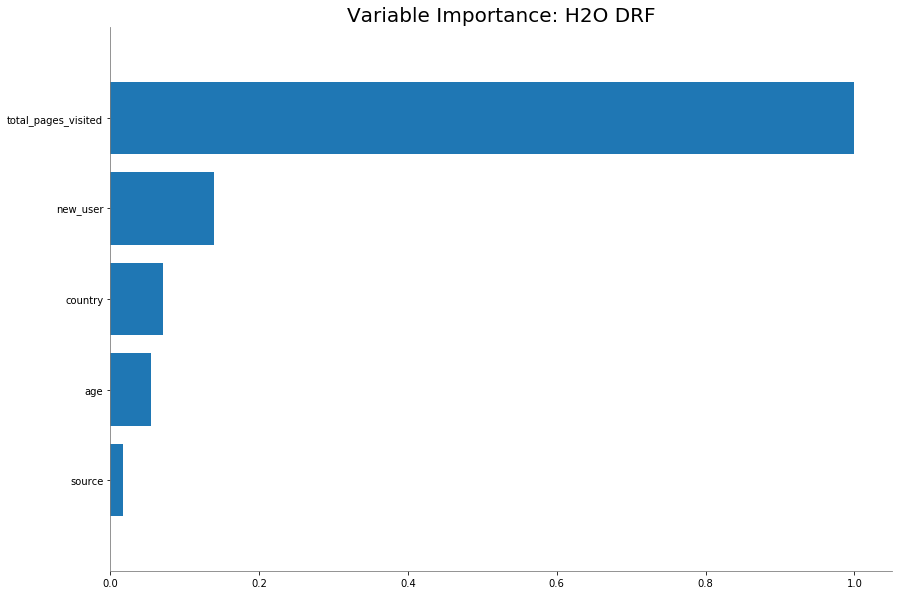

In [19]:
# Variable Importance Plot
rf_model.varimp_plot()

In [20]:
# Re-selecting controlled variables
features = ['country', 'age', 'new_user', 'source']
target = 'converted'

In [21]:
# Building second random forest model without "Total Page Visited"
rf_model2 = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=3, seed=123, score_each_iteration=True)
rf_model2.train(x=features, y=target, training_frame=data_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [22]:
# 2nd Random Forest Summary
rf_model2

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1595633528417_105


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,874444.0,14.0,20.0,16.69,582.0,711.0,691.4




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.415030129255225
RMSE: 0.6442283207491153
LogLoss: 1.3741951386763267
Mean Per-Class Error: 0.25241372466444867
AUC: 0.826230919029774
AUCPR: 0.7987559869668547
Gini: 0.6524618380595479

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.01946187223818107: 


,,0,1,Error,Rate
0,0,144798.0,100221.0,0.409,(100221.0/245019.0)
1,1,30430.0,214615.0,0.1242,(30430.0/245045.0)
2,Total,175228.0,314836.0,0.2666,(130651.0/490064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.019462,0.766645,354.0
1,max f2,0.006854,0.868421,383.0
2,max f0point5,0.048092,0.755151,298.0
3,max accuracy,0.031310,0.747588,328.0
4,max precision,0.381410,0.949309,8.0
5,max recall,0.001080,1.000000,397.0
6,max specificity,0.422935,0.999984,0.0
7,max absolute_mcc,0.029032,0.496510,333.0
8,max min_per_class_accuracy,0.034210,0.745844,322.0
9,max mean_per_class_accuracy,0.031310,0.747586,328.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score:  6.15 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.265464,1.846056,1.846056,0.923077,0.302589,0.923077,0.302589,0.018462,0.018462,84.605590,84.605590,0.016923
1,2,0.020001,0.217480,1.777910,1.811983,0.889002,0.234266,0.906040,0.268427,0.017780,0.036242,77.791016,81.198303,0.032483
2,3,0.030000,0.207688,1.784395,1.802788,0.892245,0.212397,0.901442,0.249753,0.017842,0.054084,78.439513,80.278832,0.048170
3,4,0.040001,0.198865,1.764852,1.793304,0.882473,0.202784,0.896699,0.238010,0.017650,0.071734,76.485230,79.330383,0.063469
4,5,0.050002,0.184243,1.740777,1.782798,0.870435,0.192468,0.891446,0.228902,0.017409,0.089143,74.077685,78.279800,0.078287
5,6,0.100001,0.152339,1.716923,1.749861,0.858507,0.166376,0.874977,0.197639,0.085845,0.174988,71.692315,74.986125,0.149982
6,7,0.150001,0.136432,1.675135,1.724953,0.837612,0.146219,0.862522,0.180499,0.083756,0.258744,67.513457,72.495270,0.217499
7,8,0.200000,0.117271,1.621103,1.698991,0.810595,0.125425,0.849540,0.166731,0.081055,0.339799,62.110324,69.899060,0.279612
8,9,0.300000,0.084511,1.541525,1.646503,0.770804,0.101849,0.823295,0.145104,0.154151,0.493950,54.152537,64.650254,0.387922
9,10,0.400001,0.053644,1.386626,1.581533,0.693350,0.070914,0.790808,0.126556,0.138664,0.632614,38.662629,58.153282,0.465252




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-24 19:36:29,0.028 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-07-24 19:36:29,0.298 sec,1.0,0.644526,1.376805,0.825460,0.797812,1.791824,0.266169
2,,2020-07-24 19:36:29,0.521 sec,2.0,0.644535,1.376415,0.825700,0.798338,1.815438,0.265968
3,,2020-07-24 19:36:29,0.715 sec,3.0,0.644234,1.375054,0.826427,0.799023,1.834419,0.265796
4,,2020-07-24 19:36:29,0.914 sec,4.0,0.644177,1.374305,0.826533,0.799346,1.844428,0.265707
5,,2020-07-24 19:36:30,1.147 sec,5.0,0.644103,1.373953,0.826454,0.799139,1.843071,0.264733
6,,2020-07-24 19:36:30,1.410 sec,6.0,0.644060,1.374020,0.826411,0.798914,1.839642,0.266086
7,,2020-07-24 19:36:30,1.659 sec,7.0,0.644075,1.374007,0.826379,0.798842,1.838842,0.266884
8,,2020-07-24 19:36:30,1.968 sec,8.0,0.644137,1.374219,0.826378,0.798980,1.839625,0.266307
9,,2020-07-24 19:36:31,2.277 sec,9.0,0.644182,1.374344,0.826321,0.798990,1.840376,0.266133



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,new_user,1.714703e+06,1.000000,0.532893
1,country,1.034596e+06,0.603368,0.321530
2,age,4.268906e+05,0.248959,0.132668
3,source,4.153552e+04,0.024223,0.012908


In [23]:
# Making Predictions Using Random Forest Model#2
rf_model2.model_performance(data_test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.030165087497408514
RMSE: 0.17368099348347968
LogLoss: 0.12770400342427007
Mean Per-Class Error: 0.2576510003198387
AUC: 0.8133705072646326
AUCPR: 0.12688881366050547
Gini: 0.6267410145292651

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11415328823494804: 


,,0,1,Error,Rate
0,0,57187.0,3794.0,0.0622,(3794.0/60981.0)
1,1,1380.0,703.0,0.6625,(1380.0/2083.0)
2,Total,58567.0,4497.0,0.082,(5174.0/63064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.114153,0.213678,91.0
1,max f2,0.053394,0.324744,173.0
2,max f0point5,0.126748,0.178629,79.0
3,max accuracy,0.393977,0.966938,0.0
4,max precision,0.393977,0.333333,0.0
5,max recall,0.000005,1.000000,399.0
6,max specificity,0.393977,0.999934,0.0
7,max absolute_mcc,0.053394,0.208693,173.0
8,max min_per_class_accuracy,0.032794,0.739318,224.0
9,max mean_per_class_accuracy,0.032794,0.742349,224.0



Gains/Lift Table: Avg response rate:  3.30 %, avg score:  3.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010497,0.197993,6.494154,6.494154,0.214502,0.232711,0.214502,0.232711,0.068171,0.068171,549.415423,549.415423,0.059644
1,2,0.020693,0.166452,5.273504,5.892715,0.174184,0.179226,0.194636,0.206358,0.053769,0.121940,427.350417,489.271516,0.104705
2,3,0.032396,0.150262,4.512618,5.394178,0.149051,0.155330,0.178169,0.187925,0.052808,0.174748,351.261795,439.417784,0.147215
3,4,0.040625,0.146332,3.733403,5.057745,0.123314,0.147824,0.167057,0.179801,0.030725,0.205473,273.340289,405.774451,0.170478
4,5,0.050171,0.131740,4.727414,4.994894,0.156146,0.138343,0.164981,0.171913,0.045127,0.250600,372.741366,399.489395,0.207275
5,6,0.100787,0.097209,3.405052,4.196471,0.112469,0.112093,0.138609,0.141871,0.172348,0.422948,240.505248,319.647136,0.333166
6,7,0.151560,0.068134,2.552905,3.645865,0.084322,0.080948,0.120423,0.121462,0.129621,0.552568,155.290515,264.586464,0.414706
7,8,0.202937,0.048355,1.840829,3.188894,0.060802,0.055479,0.105329,0.104757,0.094575,0.647144,84.082905,218.889361,0.459380
8,9,0.300821,0.031466,1.201606,2.542247,0.039689,0.036455,0.083970,0.082532,0.117619,0.764762,20.160590,154.224730,0.479788
9,10,0.401402,0.020982,0.778010,2.100177,0.025698,0.025709,0.069369,0.068294,0.078253,0.843015,-22.199008,110.017739,0.456698


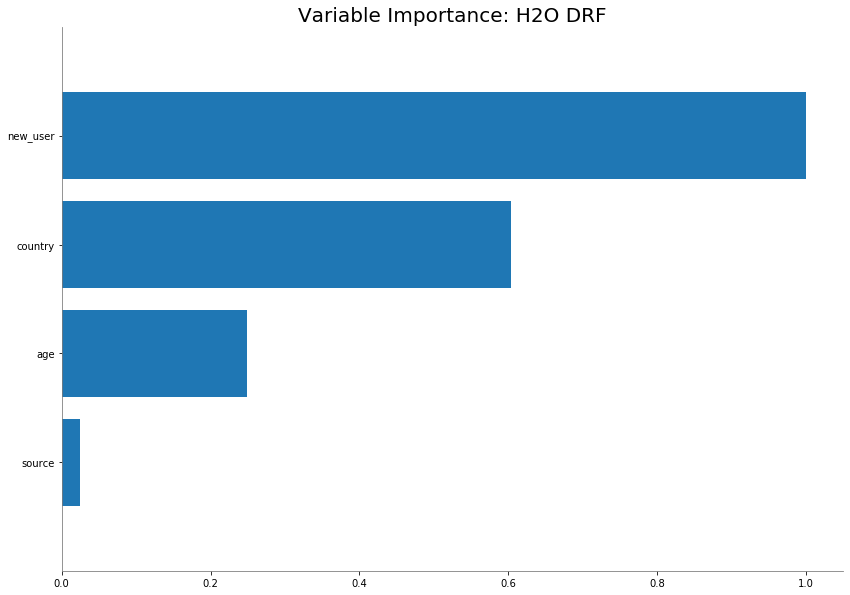

In [24]:
# Variable Importance Plot
rf_model2.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


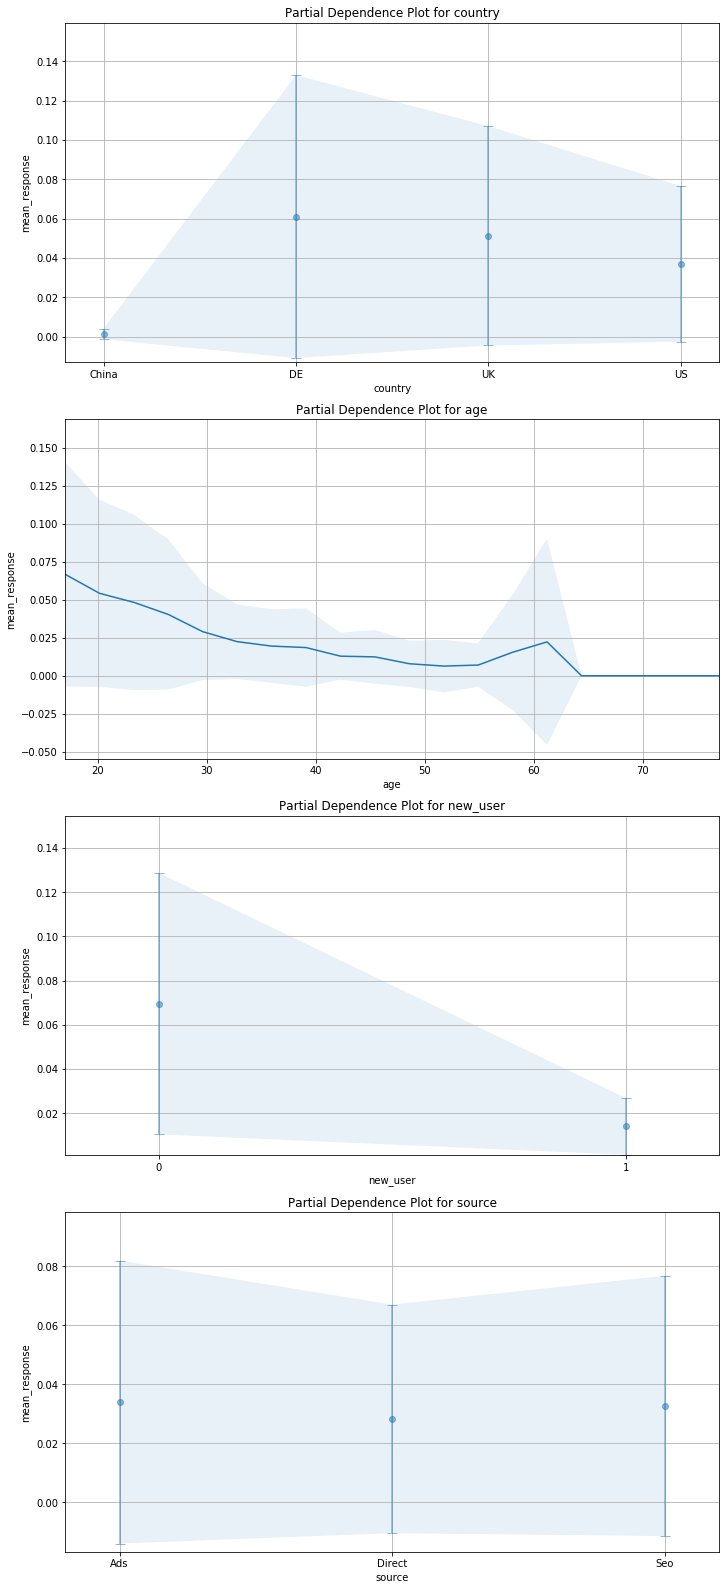

In [25]:
# Partial Dependence Plot
Partial_Plot = rf_model2.partial_plot(data_train, cols=features, figsize=(10, 22))

In [26]:
# Shutting down h2o instance
h2o.cluster().shutdown()

H2O session _sid_b8d3 closed.
